# Problèmes inverses et ingénierie - approche stochastique et statistique

## Time-reversal refocusing in homogeneous and randomly heterogeneous media

Victor Jesequel - Cyrielle Théobald

Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import display
from PIL import Image

### 1 - Paraxial approximation in a homogeneous medium.

**Objective :**
- What? Simulate the propagation of a Gaussian beam in a homogeneous medium 
- How? Using the paraxial approximation of the Helmholtz equation : $u(x) = \phi(x)e^{ikz}$
- Compare numerical results with theoretical predictions.

**Theoretical Background:**

The paraxial wave equation (Schrödinger equation) for the complex amplitude $\phi$:
$$
2ik\partial_z\phi + \partial_x^2\phi = 0
$$
- **Initial condition** (Gaussian beam at \(z=0\)):
  $$
  \phi_0(x) = \exp\left(-\frac{x^2}{r_0^2}\right), \quad r_0 = 2
  $$
- **Fourier method**. We will solve the Schrödinger equationn using the Fourier method:

![Title](fourier_method.png)

- **Theoretical transmitted wave** at \(z=L\):
  $$
  \phi_t(x) = \frac{r_0}{r_t}\exp\left(-\frac{x^2}{r_t^2}\right), \quad r_t = r_0\left(1 + 2i\frac{L}{kr_0^2}\right)^{1/2}
  $$

Parameters

In [60]:
radius = 2
N_points_x = 2**10
x_max = 60
k = 1
w = 1
L = 10
N_points_z = 100

Compute numerically the transmitted wave profile

In [61]:
# Spatial grid (x-axis and z-axis)
x = np.linspace(-x_max/2, x_max/2, N_points_x)
dx = x[1] - x[0]
z = np.linspace(0, L, N_points_z)
dz = z[1] - z[0]

# Initial gaussian at z = 0
phi_0 = np.exp(-x**2/(radius**2))

# Frequencies for the FFT
frequencies = 2*np.pi*np.fft.fftfreq(N_points_x, dx)

# Solving the Schrödinger equation using the Fourier method:
# 2ik dzψ + d²xψ = 0
phi = phi_0.copy() # At z = 0

for zi in z:
    phi_hat = np.fft.fft(phi)
    # Propagate in Fourier space
    phi_hat = phi_hat * np.exp(-1j * frequencies**2 * dz / (2 * k))
    phi = np.fft.ifft(phi_hat) 

phi_t = phi # At z = L


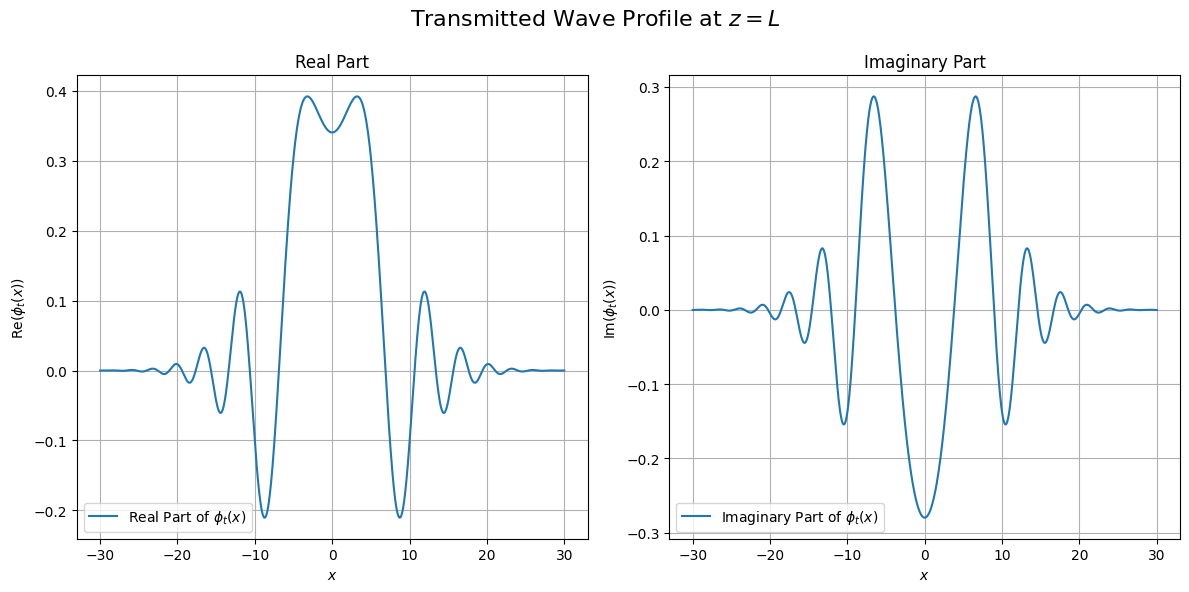

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Transmitted Wave Profile at $z = L$", fontsize=16)

# Transmitted Wave Profile (Real Part)
axs[0].plot(x, np.real(phi_t), label=r"Real Part of $\phi_t(x)$")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"$\operatorname{Re}(\phi_t(x))$")
axs[0].set_title("Real Part")
axs[0].legend(loc="lower left")
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_t), label=r"Imaginary Part of $\phi_t(x)$")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"$\operatorname{Im}(\phi_t(x))$")
axs[1].set_title("Imaginary Part")
axs[1].legend(loc="lower left")
axs[1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()



Compare the numerical transmitted wave with the theoretical profile

**Let's compute the theoretical wave profile :**

**1) DFT:**

$$
\hat{\Phi}_0(f) = \int_{\mathbb{R}} e^{-x^2/r_0^2} e^{i f x} dx = \sqrt{\pi r_0^2} e^{-f^2 r_0^2 /4}
$$

**2) Exploding ODE:**

$$
2i k \partial _z \Phi + \partial^2_x \Phi = 0 
\Rightarrow 2i k \partial _z \hat{\Phi} + f^2 \hat{\Phi} = 0
$$

Its solution is
$$
\hat{\Phi}(z, f) = \hat{\Phi}_0(f) e^{- \frac{i f^2 z}{2k}}
= r_0 \sqrt{\pi} e^{- \frac{f^2 r_0^2}{4} \left( 1 + \frac{2iz}{k r_0^2} \right)}
$$

**3) IFT:**

$$
\Phi(z,x) = \frac{1}{2\pi} \int_{\mathbb{R}} \hat{\Phi}(z,f) e^{-if x} df
$$

$$
= \frac{r_0 \sqrt{\pi}}{2 \pi} \int_{\mathbb{R}} \exp \left[ -\frac{f^2 r_0^2}{4} \left( 1 + \frac{2iz}{k r_0^2} \right) - if x \right] df
$$

$$
= \frac{r_0}{2 \sqrt{\pi}} \frac{\sqrt{\pi}}{\sqrt{(\frac{r_0^2}{4})(1+\frac{2iz}{k r_0^2})}}\exp \left[ \frac{-x^2}{r_0^2(1+\frac{2iz}{k r_0^2})} \right]
$$

Finally, we have 
$$
\Phi(z,x) = \frac{r_0}{r_t} \exp \left( -\frac{x^2}{r_t^2} \right)
$$

$$
\text{with }
r_t = r_0\sqrt{1 + \frac{2iz}{k r_0^2}}
$$


In [63]:
# Check 
rt = radius * np.sqrt(1 + 2j * L / (k * radius**2))
phi_t_theoretical = (radius / rt) * np.exp(-x**2 / rt**2)

# Check the square modulus
phi_t_sq_modulus = np.abs(phi_t)**2
phi_t_theoretical_sq_modulus = np.abs(phi_t_theoretical)**2

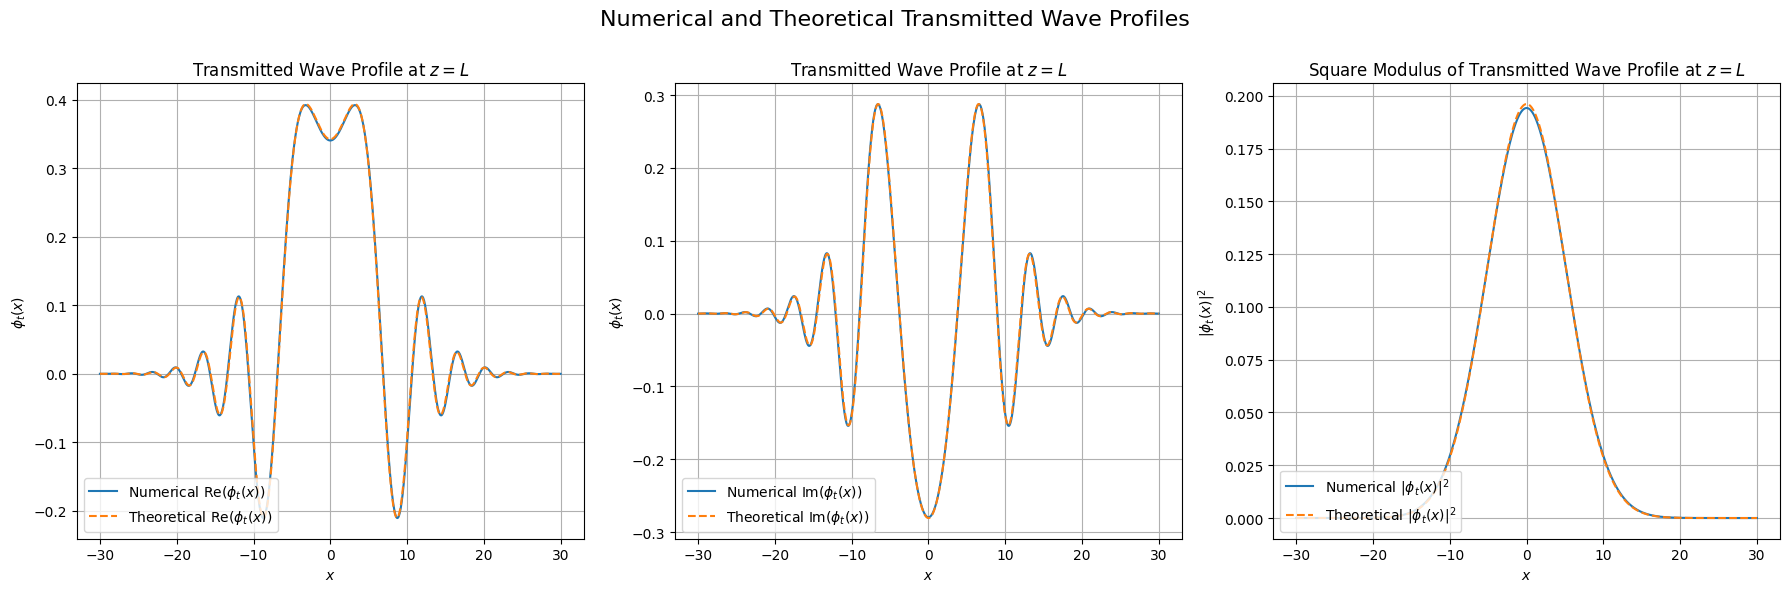

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Transmitted Wave Profile (Real Part)
axs[0].plot(x, np.real(phi_t), label=r"Numerical $\operatorname{Re}(\phi_t(x))$")
axs[0].plot(x, np.real(phi_t_theoretical), label=r"Theoretical $\operatorname{Re}(\phi_t(x))$", linestyle="--")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"$\phi_t(x)$")
axs[0].set_title("Transmitted Wave Profile at $z = L$")
axs[0].legend(loc = "lower left")
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_t), label=r"Numerical $\operatorname{Im}(\phi_t(x))$")
axs[1].plot(x, np.imag(phi_t_theoretical), label=r"Theoretical $\operatorname{Im}(\phi_t(x))$", linestyle="--")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"$\phi_t(x)$")
axs[1].set_title("Transmitted Wave Profile at $z = L$")
axs[1].legend(loc = "lower left")
axs[1].grid(True)

# Square Modulus
axs[2].plot(x, phi_t_sq_modulus, label=r"Numerical $|\phi_t(x)|^2$")
axs[2].plot(x, phi_t_theoretical_sq_modulus, "--", label=r"Theoretical $|\phi_t(x)|^2$")
axs[2].set_xlabel("$x$")
axs[2].set_ylabel(r"$|\phi_t(x)|^2$")
axs[2].set_title("Square Modulus of Transmitted Wave Profile at $z = L$")
axs[2].legend(loc="lower left")
axs[2].grid(True)

fig.suptitle("Numerical and Theoretical Transmitted Wave Profiles", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### 2 - Time reversal for time-harmonic waves in a homogeneous medium.

**Objective:**
- Study refocusing of a time-reversed wave using a compactly supported mirror at $z=L$.

**Theoretical Background:**

**Time-Reversal Principle**
Time-reversal refocusing exploits the invariance of the wave equation under time reversal $t \rightarrow -t$. For time-harmonic waves, this corresponds to taking the complex conjugate of the wave field $\phi$:
$$
\phi^{tr}(x, z) = \overline{\phi(x, z)}.
$$

#### **Gaussian Mirror Function**
The time-reversed wave is truncated by a mirror $\chi_M(x)$ at $z = L$:
$$
\phi^{tr}(z=L, x) = \overline{\phi_t(x)} \cdot \chi_M(x),
$$
where $\phi_t(x) = \phi(L, x)$ is the transmitted wave from Part 1, and $\chi_M(x)$ is a Gaussian mirror:
$$
\chi_M(x) = \exp\left(-\frac{x^2}{r_M^2}\right).
$$

**Propagation**:  
   The wave evolves according to the paraxial equation $\partial_z \phi^{tr} = \frac{i}{2k} \partial_x^2 \phi^{tr}$. Using the Fourier transform method (as in Part 1), the refocused wave at $z = 2L$ is:
   $$
   \phi^{tr}_r(x) = \frac{1}{a_{tr}} \exp\left(-\frac{x^2}{r_{tr}^2}\right),
   $$
   where:
   $$
   r_{tr}^2 = \left(\frac{1}{r_M^2} + \frac{1}{r_0^2 - 2iL/k}\right)^{-1} + 2i\frac{L}{k},
   $$
   $$
   a_{tr} = \sqrt{1 + \frac{4L^2}{k^2 r_0^2 r_M^2} + 2i\frac{L}{k r_M^2}}.
   $$

In [65]:
z = np.linspace(L, 2*L, N_points_z)
dz = z[1] - z[0]

def time_reversal_mirror(x, r_M):
    """Time-reversal mirror in the plane z=L"""
    ksi = (1 - (x / r_M)**2)**2
    indicator = np.abs(x) < 2*r_M
    return ksi*indicator

def time_reversal_mirror_gaussian(x, r_M):
    """Gaussian time-reversal mirror"""
    return np.exp(-x**2 / r_M**2) 

def time_reversal_experiment(phi_t, r_M, gaussian_mirror = False):
    """Perform time-reversal experiment."""
    
    # Time-reversed wave at z = L
    if not gaussian_mirror:
        phi_tr_L = np.conj(phi_t) * time_reversal_mirror(x, r_M)
    else :
        phi_tr_L = np.conj(phi_t) * time_reversal_mirror_gaussian(x, r_M)
    
    # Propagate phi_tr from z = L to z = 2L
    phi_tr = phi_tr_L.copy()
    for zi in z:
        phi_tr_hat = np.fft.fft(phi_tr)
        phi_tr_hat = phi_tr_hat * np.exp(-1j * frequencies**2 * dz / (2 * k))
        phi_tr = np.fft.ifft(phi_tr_hat) 
    
    return phi_tr

r_M_list = [2, 5, 10, 15, 20]
refocused_wave_list = []

for r_M in r_M_list:
    refocused_wave = time_reversal_experiment(phi_t, r_M)
    refocused_wave_list.append(refocused_wave)

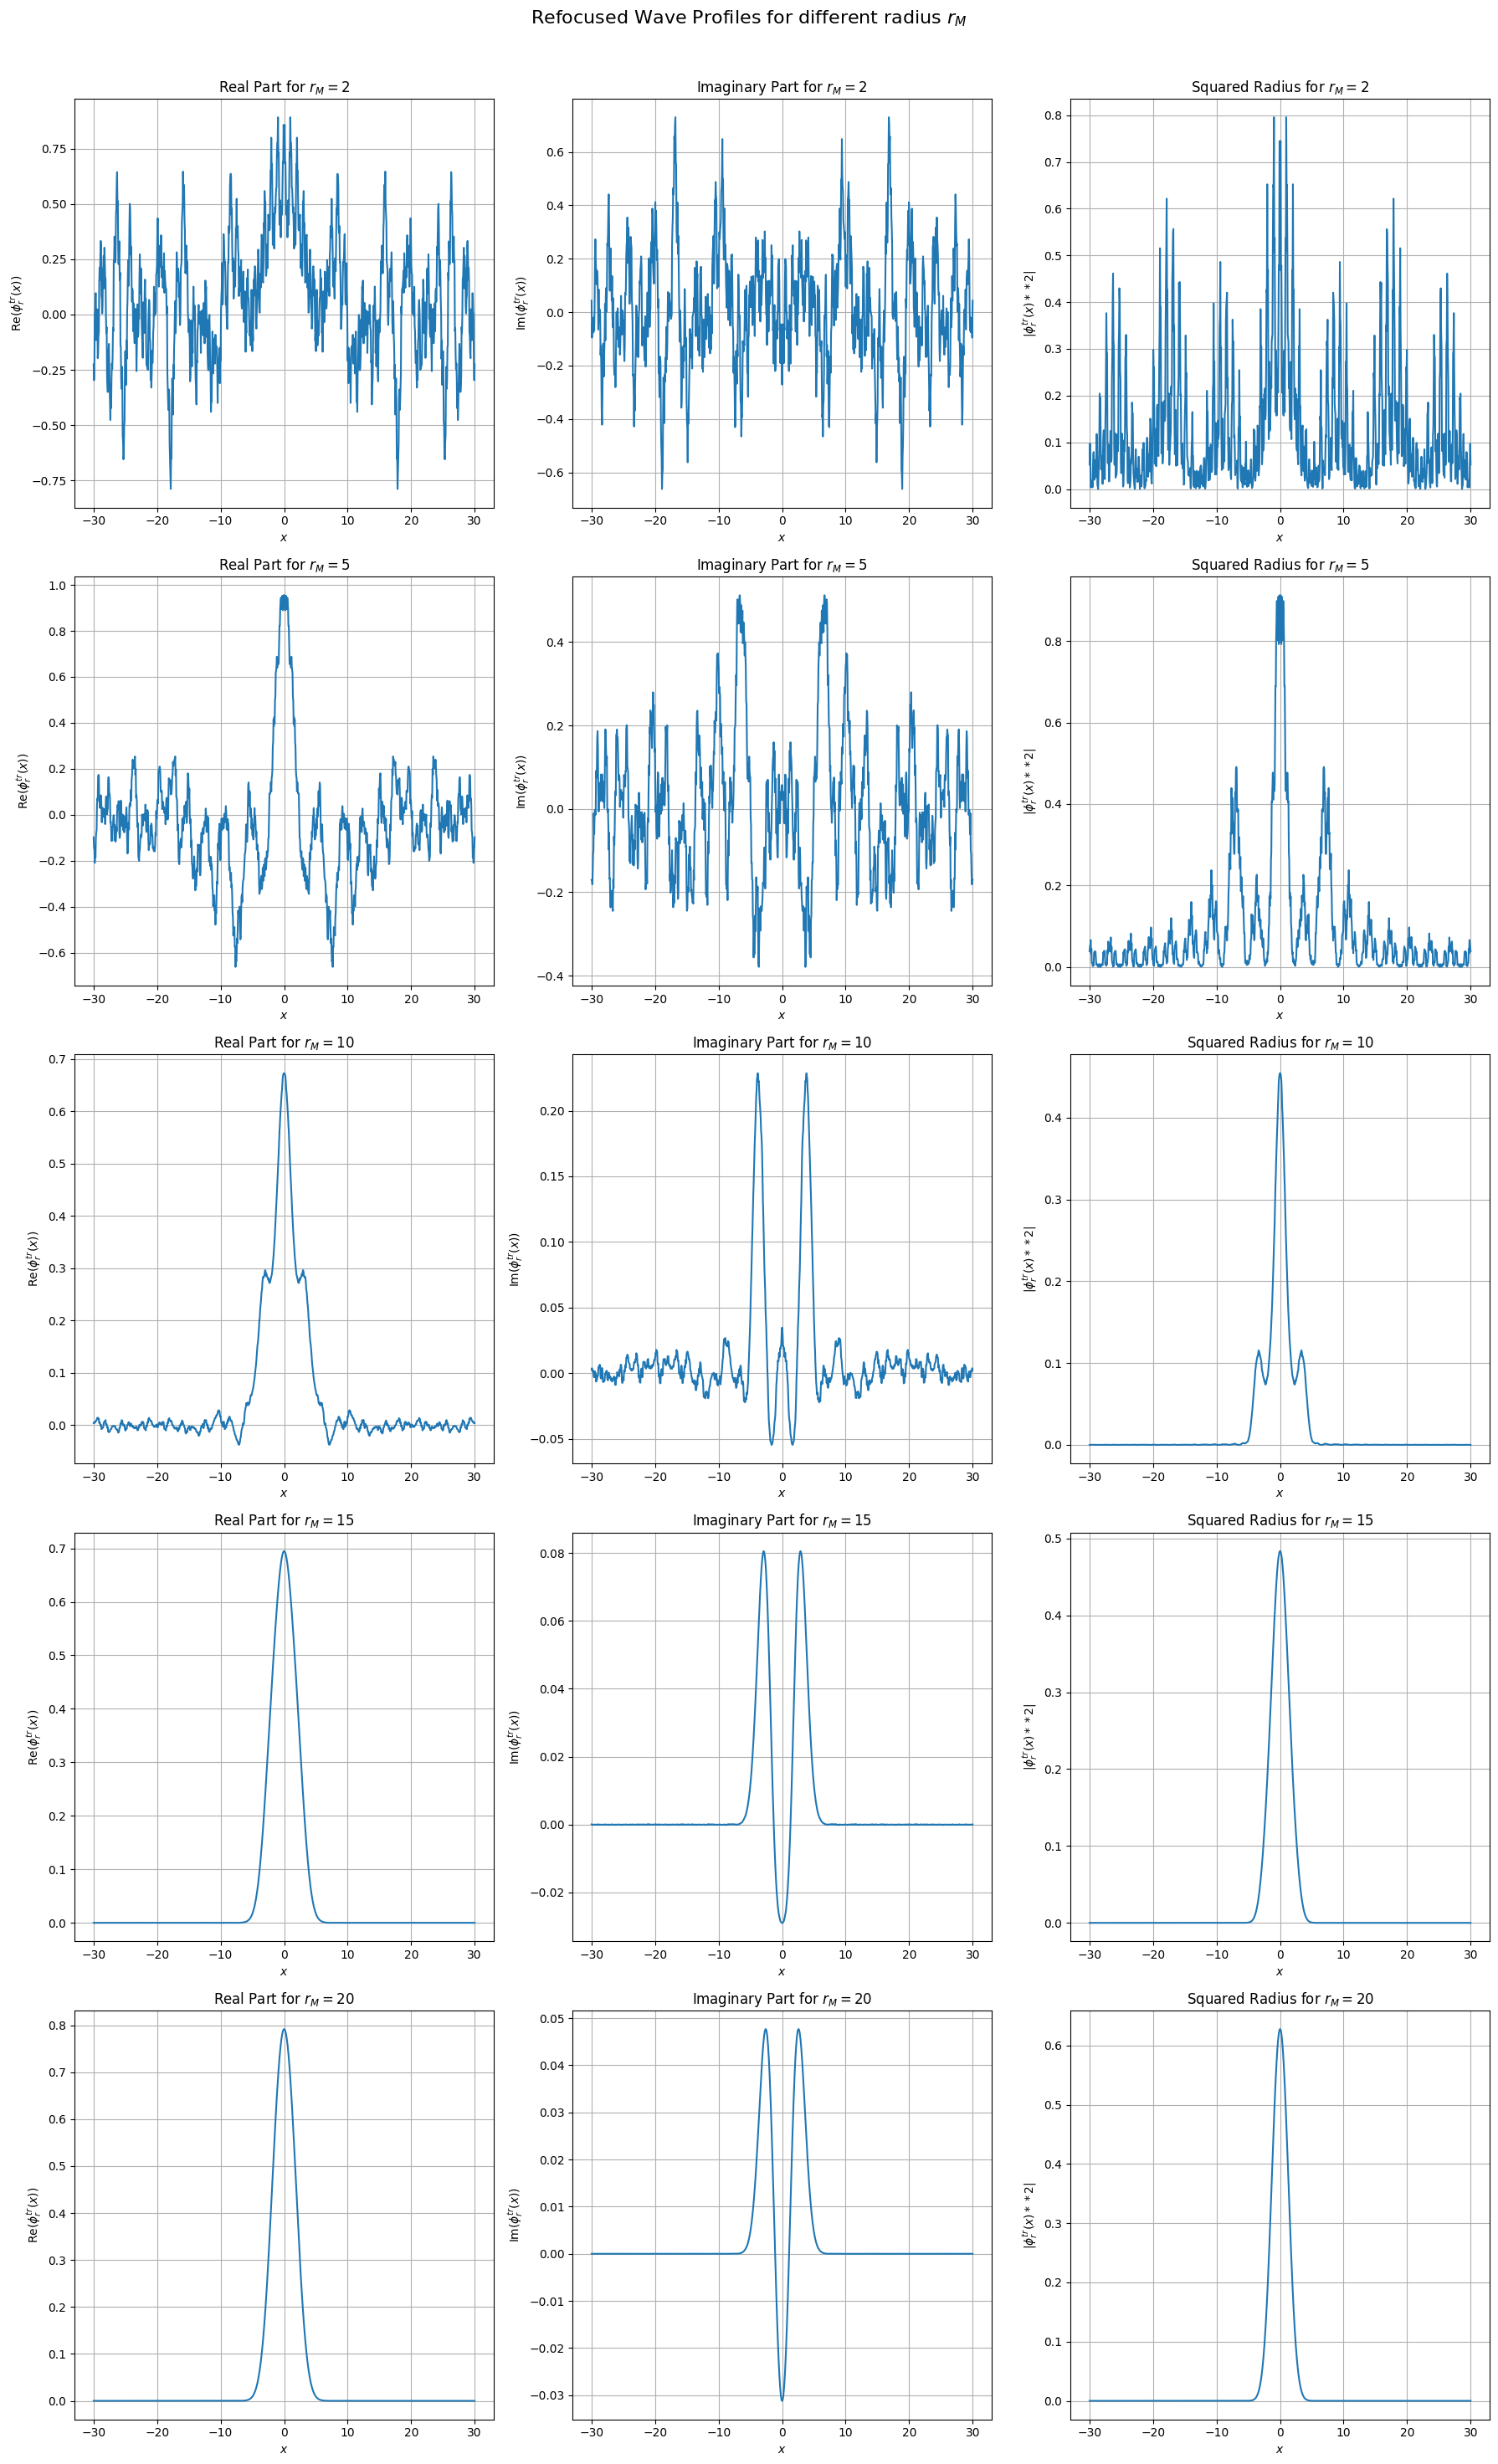

In [69]:
fig, axs = plt.subplots(len(r_M_list), 3, figsize=(18, 6 * len(r_M_list)))
fig.suptitle("Refocused Wave Profiles for different radius $r_M$", fontsize=16)

for i, r_M in enumerate(r_M_list):
    # Real part
    axs[i, 0].plot(x, np.real(refocused_wave_list[i]), label=f"Real part, $r_M = {r_M}$")
    axs[i, 0].set_xlabel("$x$")
    axs[i, 0].set_ylabel(r"Re($\phi^{tr}_r(x)$)")
    axs[i, 0].set_title(f"Real Part for $r_M = {r_M}$")
    # axs[i, 0].legend(loc = "upper right")
    axs[i, 0].grid(True)

    # Imaginary part
    axs[i, 1].plot(x, np.imag(refocused_wave_list[i]), label=f"Imaginary part, $r_M = {r_M}$")
    axs[i, 1].set_xlabel("$x$")
    axs[i, 1].set_ylabel(r"Im($\phi^{tr}_r(x)$)")
    axs[i, 1].set_title(f"Imaginary Part for $r_M = {r_M}$")
    # axs[i, 1].legend(loc = "upper right")   
    axs[i, 1].grid(True)

    # Squared Radius
    axs[i, 2].plot(x, np.abs(refocused_wave_list[i])**2, label=f"Squared radius, $r_M = {r_M}$")
    axs[i, 2].set_xlabel("$x$")
    axs[i, 2].set_ylabel(r"$|\phi^{tr}_r(x)**2|$")
    axs[i, 2].set_title(f"Squared Radius for $r_M = {r_M}$")
    # axs[i, 2].legend(loc = "upper right")
    axs[i, 2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Check with the theoretical refocused wave profile :

**Let's compute the theoretical transmitted wave profile:**

**1) Gaussian Mirror :**

We start at $z=L$, with the wave profile $\Phi_t(x) = \frac{r_0}{r_t} \exp(-\frac{x^2}{r_t^2})$ with $r_t = r_0(1+\frac{2iL}{kr_0^2})^{-1/2}$

Gaussian mirror : The wave profile transmitted through the gaussian mirror is 
$$
\Phi^{tr}(z=L, x) = \Phi_t(x)^* \chi_M(x)
$$
$$
=  \Phi_t(x)^* \exp(-\frac{x^2}{r_M^2})
$$
$$
= \frac{r_0}{r_t^*}\exp(-x^2(\frac{1}{{r_t^*}^2}+\frac{1}{r_M^2}))
$$

**2) DFT:**

$$
\hat \Phi^{tr}(z=L, f) = \int \Phi^{tr}(z=L, x)e^{ifx}
$$
$$
= \frac{r_0}{r_t^*} \int \exp \left[ -x^2(\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}) + ifx \right]
$$

$$
= \frac{r_0}{r_t^*} \sqrt{\frac{\pi}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}}} \exp \left[-\frac{f^2}{4}\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} \right]
$$

**3) Exploding ODE:**

$$
\hat \Phi^{tr}(z=2L, f) = \hat \Phi^{tr}(z=L, f)e^{-\frac{if^2}{2k}L}
$$
$$
= \frac{r_0}{r_t^*} \sqrt{\frac{\pi}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}}} \exp \left[ -\frac{f^2}{4} \left(\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k} \right) \right]
$$

**4) IFT:**

$$
\Phi^{tr}(z=2L, x) = \frac{1}{2\pi} \int{
    \hat \Phi^{tr}(z=2L, f) e^{-ifx} df
    }
$$
$$
= \frac{1}{2\pi}\frac{r_0}{r_t^*} \sqrt{\frac{\pi}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}}} 
\int{
    \exp \left[ -\frac{f^2}{4} \left(\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k} \right) -ifx \right] df
}
$$

$$
= \frac{1}{2\pi}\frac{r_0}{r_t^*} \sqrt{\frac{\pi}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}}} \frac{\sqrt{4\pi}}{\sqrt{\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k}}} \exp \left[\frac{-x^2}{\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k}}\right]
$$

$$
= \frac{r_0}{r_t^*} \sqrt{\frac{1}{(\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2})(\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k})}} \exp \left[\frac{-x^2}{\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k}}\right]
$$

$$
= \frac{r_0}{r_t^*} \sqrt{
    \frac{1}{1+(\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2})\frac{2iL}{k}}
    } 
\exp \left[\frac{-x^2}{\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k}}\right]
$$
$$
= \frac{1}{\sqrt{1-\frac{2iL}{kr_0^2}} \sqrt{
    1+\frac{2iL}{kr_M^2} + \frac{2iL}{kr_0^2(1-\frac{2iL}{kr_0^2})}
    }} 
\exp \left[\frac{-x^2}{\frac{2iL}{k} + \frac{1}{
    \frac{1}{r_0^2(1-\frac{2iL}{kr_0^2})} + \frac{1}{r_M^2}
}}\right]
$$

$$
= \frac{1}{\sqrt{1 +\frac{2iL}{k}(\frac{1}{r_M^2}- \frac{1}{r_0^2}) + \frac{4L^2}{k^2r_0^2r_M^2} + \frac{2iL}{kr_0^2}}} 
\exp \left[\frac{-x^2}{\frac{2iL}{k} + \frac{1}{
    \frac{1}{r_0^2(1-\frac{2iL}{kr_0^2})} + \frac{1}{r_M^2}
}}\right]
$$

$$
= \frac{1}{\sqrt{1 +\frac{2iL}{k r_M^2} + \frac{4L^2}{k^2r_0^2r_M^2}}} 
\exp \left[\frac{-x^2}{\frac{2iL}{k} + \frac{1}{
    \frac{1}{r_0^2(1-\frac{2iL}{kr_0^2})} + \frac{1}{r_M^2}
}}\right]
$$

Finally, 
$$
\Phi^{tr}(L, x) = \frac{1}{a_{tr}}\exp(-\frac{x^2}{r_{tr}^2})
$$
With 
$
r_{tr}^2 = \frac{2iL}{k} + \left(\frac{1}{r_0^2(1-\frac{2iL}{kr_0^2})} + \frac{1}{r_M^2} \right)^{-1}
$
and
$
a_{tr} = \left(1 +\frac{2iL}{k r_M^2} + \frac{4L^2}{k^2r_0^2r_M^2}\right)^{1/2}
$

In [57]:
r_M = 20
phi_tr_numerical = time_reversal_experiment(phi_t, r_M, gaussian_mirror=True)

# Theoretical refocused wave profile with r_M = 20
r_tr_squared = 1/(1 / r_M**2 + 1 / (radius**2 - 2j * L / k)) + 2j * L / k
a_tr = np.sqrt(1 + 4 * L**2 / (k**2 * radius**2 * r_M**2) + 2j * L / (k * r_M**2))

phi_tr_r_theoretical = (1 / a_tr) * np.exp(-x**2 / r_tr_squared)

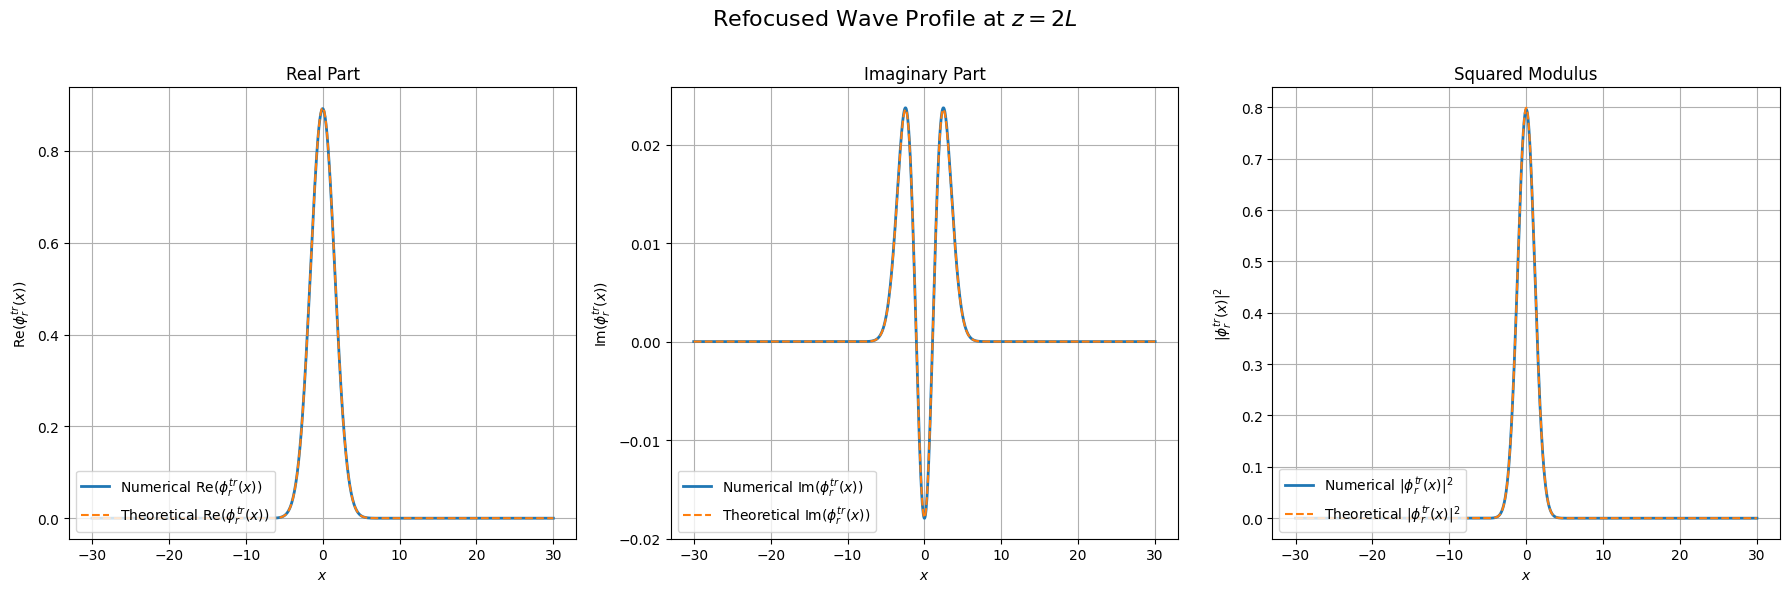

In [58]:
# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Refocused Wave Profile at $z = 2L$", fontsize=16)

# Real part
axs[0].plot(x, np.real(phi_tr_numerical), label=r"Numerical $\operatorname{Re}(\phi^{tr}_r(x))$", linewidth=2)
axs[0].plot(x, np.real(phi_tr_r_theoretical), "--", label=r"Theoretical $\operatorname{Re}(\phi^{tr}_r(x))$")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"$\operatorname{Re}(\phi^{tr}_r(x))$")
axs[0].set_title("Real Part")
axs[0].legend(loc="lower left")
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_tr_numerical), label=r"Numerical $\operatorname{Im}(\phi^{tr}_r(x))$", linewidth=2)
axs[1].plot(x, np.imag(phi_tr_r_theoretical), "--", label=r"Theoretical $\operatorname{Im}(\phi^{tr}_r(x))$")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"$\operatorname{Im}(\phi^{tr}_r(x))$")
axs[1].set_title("Imaginary Part")
axs[1].legend(loc="lower left")
axs[1].grid(True)

# Squared Modulus
axs[2].plot(x, np.abs(phi_tr_numerical)**2, label=r"Numerical $|\phi^{tr}_r(x)|^2$", linewidth=2)
axs[2].plot(x, np.abs(phi_tr_r_theoretical)**2, "--", label=r"Theoretical $|\phi^{tr}_r(x)|^2$")
axs[2].set_xlabel("$x$")
axs[2].set_ylabel(r"$|\phi^{tr}_r(x)|^2$")
axs[2].set_title("Squared Modulus")
axs[2].legend(loc="lower left")
axs[2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### 3 - Paraxial approximation in a random medium.

**Objective**
- Simulate wave propagation in a random medium.
- Compare the mean transmitted wave with theoretical predictions.

In [27]:
h = 1 
z_c = 1
x_c = 4.0 
sigma = 1.0

def generate_random_potential(N, x_c, sigma, N_points_x, x):
    """Generate a random potential of the form μ(z, x) = μ_n(z, x)"""
    
    mu = np.zeros((N, N_points_x))
    covariance_matrix = sigma**2 * np.exp(-(x[:, None] - x[None, :])**2 / x_c**2)
    mean_matrix = np.zeros(N_points_x)
    for n in range(N):
        mu[n, :] = np.random.multivariate_normal(mean_matrix, covariance_matrix)
    return mu

def split_step_fourier(phi_0, k, h, L, mu):
    phi = phi_0.copy()
    phi_hat = np.fft.fft(phi)
    operator = np.exp(-1j * (frequencies**2 / (2 * k)) * h)
    for z in range(0, L, h):
        phi_hat *= operator  # Fourier step
        phi = np.fft.ifft(phi_hat) * np.exp(1j * (k / 2) * mu[z//z_c, :])  # Potential step
        phi_hat = np.fft.fft(phi)  # Transform back
    return phi

# Perform multiple runs to estimate the mean transmitted wave profile
num_iters = 100 
phi_t_runs = []
N = L // z_c
for _ in tqdm(range(num_iters)):
    mu = generate_random_potential(N, x_c, sigma, N_points_x, x)
    phi_t = split_step_fourier(phi_0, k, h, L, mu)
    phi_t_runs.append(phi_t)

phi_t_mean = np.mean(phi_t_runs, axis=0)

  0%|          | 0/100 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Plotting the results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Ajout d'un titre global
fig.suptitle("Mean Transmitted Wave Profile", fontsize=16)

# Real part
axs[0].plot(x, np.real(phi_t_mean), label=r"Numerical $\operatorname{Re}(\phi_t(x))$", linewidth=2)
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"$\operatorname{Re}(\phi_t(x))$")
axs[0].set_title("Real Part")
axs[0].legend(loc="lower left")
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_t_mean), label=r"Numerical $\operatorname{Im}(\phi_t(x))$", linewidth=2)
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"$\operatorname{Im}(\phi_t(x))$")
axs[1].set_title("Imaginary Part")
axs[1].legend(loc="lower left")
axs[1].grid(True)

# Ajustement pour éviter le chevauchement du titre global
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# Theoretical result
gamma_0 = sigma**2 * z_c
rt = radius * np.sqrt(1 + 2j * L / (k * radius**2))
phi_t_theoretical_mean = (radius / rt) * np.exp(-x**2 / rt**2) * np.exp(-gamma_0 * k**2 * L / 8)

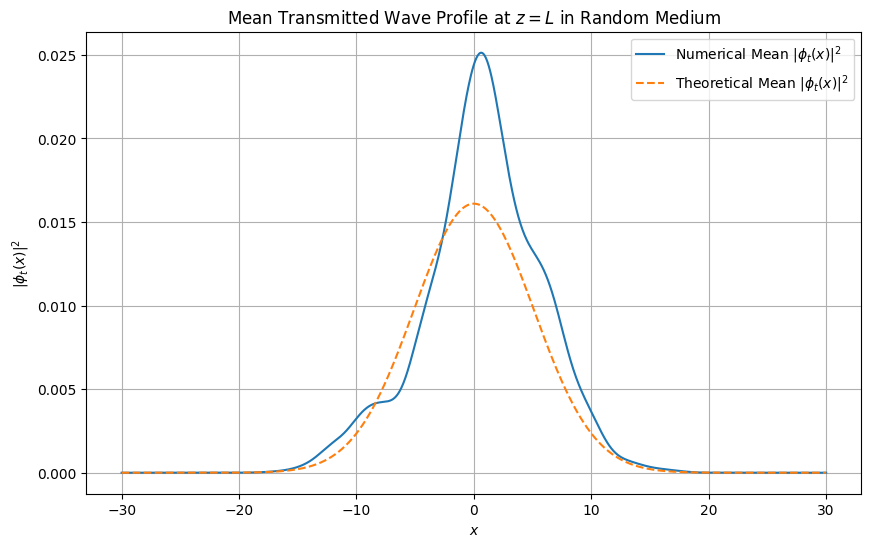

In [ ]:
# Plotting  the results

plt.figure(figsize=(10, 6))
plt.plot(x, np.abs(phi_t_mean)**2, label=r"Numerical Mean $|\phi_t(x)|^2$")
plt.plot(x, np.abs(phi_t_theoretical_mean)**2, "--", label=r"Theoretical Mean $|\phi_t(x)|^2$")
plt.xlabel("$x$")
plt.ylabel(r"$|\phi_t(x)|^2$")
plt.title("Mean Transmitted Wave Profile at $z = L$ in Random Medium")
plt.legend()
plt.grid(True)
plt.show()